In [ ]:
#screen
import FdsPy.qe.myqengine as qe
import pandas as pd

#define our universe expression
univ = qe.IdUniverse(['SP50'])

#define our time series
ts = qe.TimeSeries(start_date='-25Y',end_date = '0Y',frequency='D')
             
#define formulas
data_dict = {"price":"FG_PRICE(0)"}

calc = qe.Calculation(universe = univ, dates =ts,data_dict=data_dict)
calc.query()
df = calc.data.copy()

df

In [1]:
import pandas as pd
#df.to_pickle('sp50_price_daily_25y.pkl')
df = pd.read_pickle('sp50_price_daily_25y.pkl')

In [2]:
import numpy as np
df['date'] = pd.to_datetime(df['DATE'])

df=df.drop(columns = ['DATE'])
#df =df.set_index("date")
df=df.dropna()
df = df.rename(columns = {"date":'ds',
                          "UNIVERSE":"unique_id",
                          "price":'y'})

df['lprice']= df['y'].shift()
df['ma_3'] =df['y'].rolling(3).mean().shift()
df['ma_5'] =df['y'].rolling(5).mean().shift()
df['ma_10'] =df['y'].rolling(10).mean().shift()
df['ma_30'] =df['y'].rolling(30).mean().shift()
df['ma_50'] =df['y'].rolling(50).mean().shift()
df['ma_120'] =df['y'].rolling(120).mean().shift()
df['ma_250'] =df['y'].rolling(250).mean().shift()

df['10_30'] = df['ma_10']- df['ma_30']
df['30_50'] = df['ma_30']- df['ma_50']
df['10_50'] = df['ma_10']- df['ma_50']
df['10_120'] = df['ma_10']- df['ma_120']
df['50_120'] = df['ma_50']- df['ma_120']
df['30_50'] = df['ma_30']- df['ma_50']
df['30_120'] = df['ma_30']- df['ma_120']
df['10_250'] = df['ma_10']- df['ma_250']
df['50_1250'] = df['ma_50']- df['ma_250']
df['120_250'] = df['ma_30']- df['ma_250']
df['30_250'] = df['ma_30']- df['ma_250']

df['vol_3'] =df['y'].rolling(3).std().shift()
df['vol_5'] =df['y'].rolling(5).std().shift()
df['vol_10'] =df['y'].rolling(10).std().shift()
df['vol_30'] =df['y'].rolling(30).std().shift()
df['vol_50'] =df['y'].rolling(50).std().shift()
df['vol_120'] =df['y'].rolling(120).std().shift()

df

,unique_id,y,ds,lprice,ma_3,ma_5,ma_10,ma_30,ma_50,ma_120,...,10_250,50_1250,120_250,30_250,vol_3,vol_5,vol_10,vol_30,vol_50,vol_120
0,SP50,970.43,1997-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP50,975.04,1998-01-02,970.43,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP50,977.07,1998-01-05,975.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP50,939.21,1998-01-12,977.07,974.180000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.402514,NaN,NaN,NaN,NaN,NaN
4,SP50,952.12,1998-01-13,939.21,963.773333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.296672,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,SP50,3829.25,2022-12-27,3878.44,3840.816667,3838.494,3902.813,3959.716000,3882.2636,3921.783417,...,-212.00880,-232.55820,-155.105800,-155.105800,32.585037,26.296745,77.749649,70.317046,121.407142,172.286910
6288,SP50,3839.50,2022-12-30,3829.25,3843.360000,3833.872,3886.682,3955.478667,3885.4504,3921.651500,...,-224.31140,-225.54300,-155.514733,-155.514733,30.573186,25.260870,74.173189,74.246015,117.755681,172.352182
6289,SP50,3849.28,2022-12-29,3839.50,3849.063333,3838.240,3877.194,3950.364333,3888.6814,3921.125500,...,-230.04248,-218.55508,-156.872147,-156.872147,25.952014,23.589694,73.458816,76.817161,114.105812,172.507000
6290,SP50,3844.82,2022-12-23,3849.28,3839.343333,3843.772,3860.157,3946.765333,3891.2674,3920.708000,...,-243.30436,-212.19396,-156.696027,-156.696027,10.015919,21.900552,53.901829,78.982201,111.643073,172.620659


In [3]:
df.drop(columns = ['unique_id'],inplace=True)

df.set_index('ds',inplace=True)
df

,y,lprice,ma_3,ma_5,ma_10,ma_30,ma_50,ma_120,ma_250,10_30,...,10_250,50_1250,120_250,30_250,vol_3,vol_5,vol_10,vol_30,vol_50,vol_120
ds,,,,,,,,,,,,,,,,,,,,,
1997-12-31,970.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-02,975.04,970.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,977.07,975.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-12,939.21,977.07,974.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.402514,NaN,NaN,NaN,NaN,NaN
1998-01-13,952.12,939.21,963.773333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.296672,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3829.25,3878.44,3840.816667,3838.494,3902.813,3959.716000,3882.2636,3921.783417,4114.82180,-56.903000,...,-212.00880,-232.55820,-155.105800,-155.105800,32.585037,26.296745,77.749649,70.317046,121.407142,172.286910
2022-12-30,3839.50,3829.25,3843.360000,3833.872,3886.682,3955.478667,3885.4504,3921.651500,4110.99340,-68.796667,...,-224.31140,-225.54300,-155.514733,-155.514733,30.573186,25.260870,74.173189,74.246015,117.755681,172.352182
2022-12-29,3849.28,3839.50,3849.063333,3838.240,3877.194,3950.364333,3888.6814,3921.125500,4107.23648,-73.170333,...,-230.04248,-218.55508,-156.872147,-156.872147,25.952014,23.589694,73.458816,76.817161,114.105812,172.507000


In [4]:
df=df.dropna()

In [5]:
X_train= df[df.index < pd.Timestamp(2021,12,31)].drop(columns = ['y']) 
y_train= df[df.index < pd.Timestamp(2021,12,31)]['y'] 
X_test= df[df.index >= pd.Timestamp(2021,12,31)].drop(columns = ['y']) 
y_test= df[df.index >= pd.Timestamp(2021,12,31)]['y'] 
X_test

,lprice,ma_3,ma_5,ma_10,ma_30,ma_50,ma_120,ma_250,10_30,30_50,...,10_250,50_1250,120_250,30_250,vol_3,vol_5,vol_10,vol_30,vol_50,vol_120
ds,,,,,,,,,,,,,,,,,,,,,
2021-12-31,4793.06,4786.046667,4775.024,4707.824,4668.732667,4652.0600,4519.351500,4273.72656,39.091333,16.672667,...,434.09744,378.33344,395.006107,395.006107,7.169814,28.074171,80.257374,73.170851,70.633988,130.816870
2022-01-03,4766.18,4779.323333,4783.102,4717.575,4671.316333,4656.3880,4522.531083,4277.88384,46.258667,14.928333,...,439.69116,378.50416,393.432493,393.432493,13.449819,10.961244,80.892784,75.238347,70.868439,132.145026
2022-01-04,4796.56,4785.266667,4784.176,4735.167,4674.603000,4661.4212,4526.049917,4282.07752,60.564000,13.181800,...,453.08948,379.34368,392.525480,392.525480,16.621917,12.150413,76.478198,78.524207,71.720320,133.776691
2022-01-05,4793.54,4785.426667,4785.614,4757.719,4677.569667,4666.8994,4529.662500,4286.03652,80.149333,10.670267,...,471.68248,380.86288,391.533147,391.533147,16.736360,12.875841,50.578425,81.325492,71.127438,135.102526
2022-01-06,4700.58,4763.560000,4769.984,4758.121,4678.157667,4669.5814,4532.774333,4289.54012,79.963333,8.576267,...,468.58088,380.04128,388.617547,388.617547,54.563178,40.697224,50.051551,81.429364,69.779124,134.698977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3878.44,3840.816667,3838.494,3902.813,3959.716000,3882.2636,3921.783417,4114.82180,-56.903000,77.452400,...,-212.00880,-232.55820,-155.105800,-155.105800,32.585037,26.296745,77.749649,70.317046,121.407142,172.286910
2022-12-30,3829.25,3843.360000,3833.872,3886.682,3955.478667,3885.4504,3921.651500,4110.99340,-68.796667,70.028267,...,-224.31140,-225.54300,-155.514733,-155.514733,30.573186,25.260870,74.173189,74.246015,117.755681,172.352182
2022-12-29,3839.50,3849.063333,3838.240,3877.194,3950.364333,3888.6814,3921.125500,4107.23648,-73.170333,61.682933,...,-230.04248,-218.55508,-156.872147,-156.872147,25.952014,23.589694,73.458816,76.817161,114.105812,172.507000


In [6]:
from mapie.regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap
import xgboost as xgb

reg = xgb.XGBRegressor(
    n_estimators=1000,
    random_state=42
)

# It's Confromal Prediction time!
alpha = 0.005
gap = 3

mapie_cv = BlockBootstrap(
    n_blocks=1000,
    overlapping=True,
    random_state=42
)

mapie_enbpi = MapieTimeSeriesRegressor(
    reg,
    method="enbpi",
    cv=mapie_cv,
    agg_function="mean",
    n_jobs=-1
)


In [7]:

from mapie.metrics import (regression_coverage_score,
                           regression_mean_width_score)

mapie_enbpi = mapie_enbpi.fit(X_train, y_train)
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict(
    X_test, alpha=alpha, ensemble=True, optimize_beta=True
)
coverage_npfit = regression_coverage_score(
    y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0]
)
width_npfit = regression_mean_width_score(
    y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0]
)

In [8]:
import numpy as np
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap):step, :],
        y_test.iloc[(step - gap):step],
    )
    (
        y_pred_pfit[step:step + gap],
        y_pis_pfit[step:step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step:(step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(
    y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)

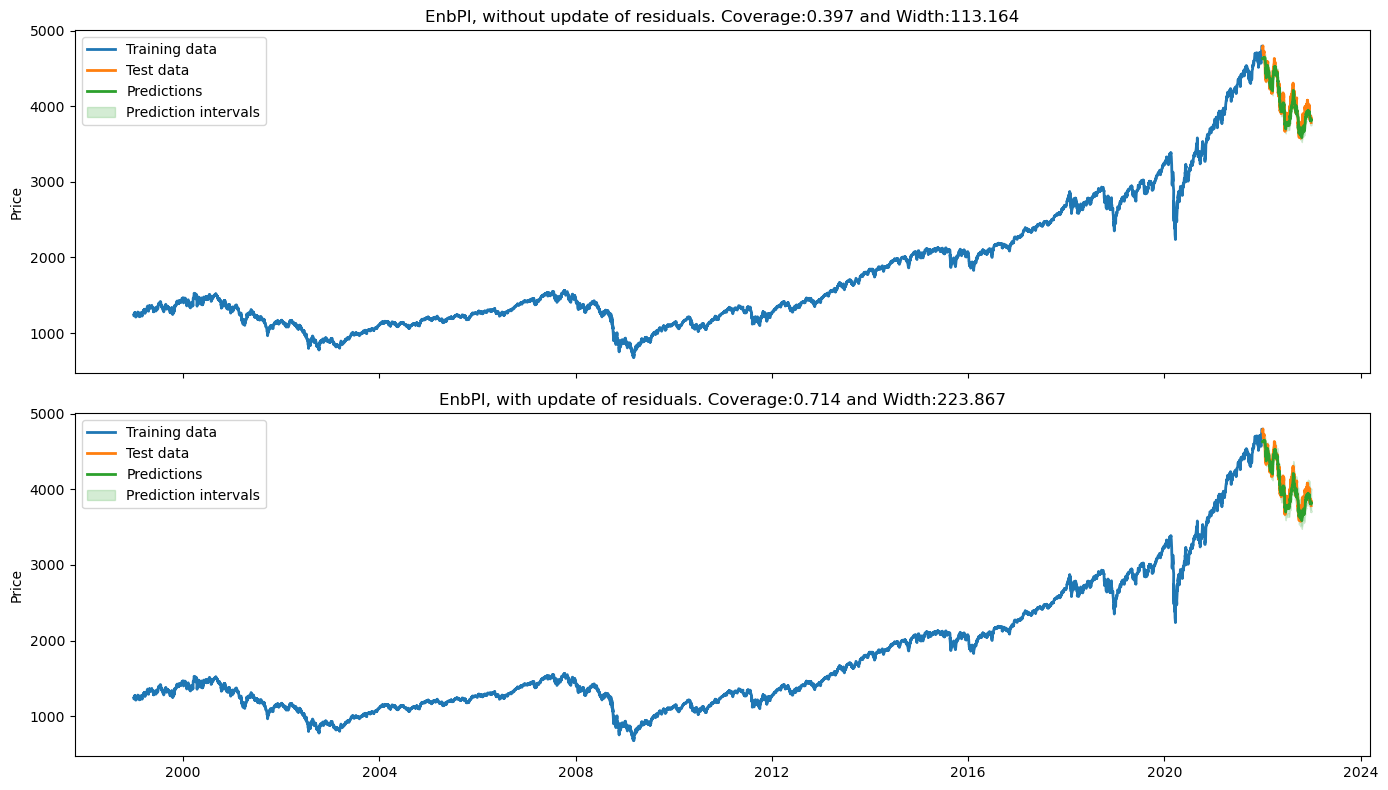

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
y_preds = [y_pred_npfit, y_pred_pfit]
y_pis = [y_pis_npfit, y_pis_pfit]
coverages = [coverage_npfit, coverage_pfit]
widths = [width_npfit, width_pfit]

fig, axs = plt.subplots(
    nrows=2, ncols=1, figsize=(14, 8), sharey="row", sharex="col"
)
for i, (ax, w) in enumerate(zip(axs, ["without", "with"])):
    ax.set_ylabel("Price")
    ax.plot(
        y_train,#[int(-len(y_test)/2):],
        lw=2,
        label="Training data", c="C0"
    )
    ax.plot(y_test, lw=2, label="Test data", c="C1")

    ax.plot(
        y_test.index, y_preds[i], lw=2, c="C2", label="Predictions"
    )
    ax.fill_between(
        y_test.index,
        y_pis[i][:, 0, 0],
        y_pis[i][:, 1, 0],
        color="C2",
        alpha=0.2,
        label="Prediction intervals",
    )
    title = f"EnbPI, {w} update of residuals. "
    title += f"Coverage:{coverages[i]:.3f} and Width:{widths[i]:.3f}"
    ax.set_title(title)
    ax.legend()

fig.tight_layout()
plt.show()

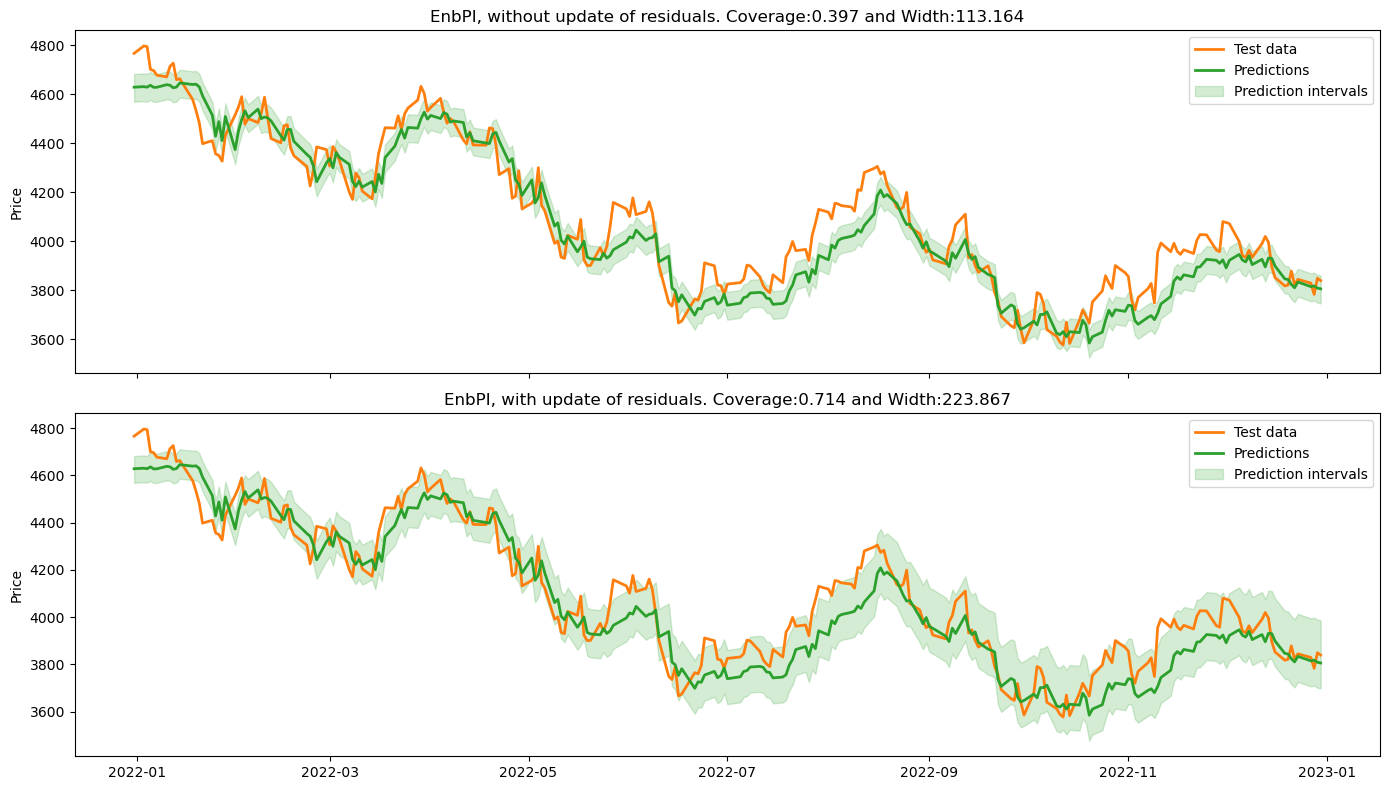

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
y_preds = [y_pred_npfit, y_pred_pfit]
y_pis = [y_pis_npfit, y_pis_pfit]
coverages = [coverage_npfit, coverage_pfit]
widths = [width_npfit, width_pfit]
y_test = y_test.sort_index()

fig, axs = plt.subplots(
    nrows=2, ncols=1, figsize=(14, 8), sharey="row", sharex="col"
)
for i, (ax, w) in enumerate(zip(axs, ["without", "with"])):
    ax.set_ylabel("Price")
    ax.plot(y_test, lw=2, label="Test data", c="C1")

    ax.plot(
        y_test.index, y_preds[i], lw=2, c="C2", label="Predictions"
    )
    ax.fill_between(
        y_test.index,
        y_pis[i][:, 0, 0],
        y_pis[i][:, 1, 0],
        color="C2",
        alpha=0.2,
        label="Prediction intervals",
    )
    title = f"EnbPI, {w} update of residuals. "
    title += f"Coverage:{coverages[i]:.3f} and Width:{widths[i]:.3f}"
    ax.set_title(title)
    ax.legend()

fig.tight_layout()
plt.show()